# Homework 3: Feature Engineering, KNN, and Decision Trees

By Rachel Manzelli and Brian Kulis with the help of N. Frumkin, K. Chauhan, and A. Tsiligkaridis


*Wine classification dataset from the UCI Machine Learning Repository: http://archive.ics.uci.edu/ml/datasets/Wine*

*Sea level dataset from NASA's climate change repository: https://climate.nasa.gov/vital-signs/*

## Preamble

Download the `hw3` folder from here: https://github.com/nfrumkin/EC414/tree/master/homework/hw3 (or clone the EC414 repository, if you prefer).

To run and solve this assignment, you must have a working Jupyter Notebook installation.

If you followed the installation instructions for `Python 3.6.x` and `Jupyter Notebook` from discussion 1, you should be set. In a terminal (cmd or Powershell for Windows users), navigate to the `hw3` folder. Then type `jupyter notebook` and press `Enter`.

If you have Anaconda, run Anaconda and choose this file (`EC414_HW3.ipynb`) in Anaconda's file explorer. Use `Python 3` version.

Below statements assume that you have already followed these instructions. If you need help with Python syntax, NumPy, or Matplotlib, you might find [Week 1 discussion material](https://github.com/nfrumkin/EC414/blob/master/discussions/Week%201%20-%20Python%20Review.ipynb) useful. 

To run code in a cell or to render [Markdown](https://en.wikipedia.org/wiki/Markdown)+[LaTeX](https://en.wikipedia.org/wiki/LaTeX) press `Ctrl+Enter` or `[>|]` ("play") button above. To edit any code or text cell [double] click on its content. To change cell type, choose "Markdown" or "Code" in the drop-down menu above.

Put your solution into boxes marked with **`[double click here to add a solution]`** and press Ctrl+Enter to render text. [Double] click on a cell to edit or to see its source code. You can add cells via **`+`** sign at the top left corner.

Submission instructions: please upload your completed solution file(s) to Blackboard by the due date (see Schedule).

## Problem 1: Feature Engineering

Given the sea level rise data over the past 25 years as a training set (`sealevel_train.csv`) and the past year's sea level rise data as a testing set (`sealevel_test.csv`):

**a.** Apply Ordinary Least Squares regression on the training data. Plot both the training data and the regression curve on the same figure. *(Hint: use your code from Homework 2!)*

**b.** Using the testing set, calculate the mean squared error (MSE) between the ground truth testing data and the prediction given by your regression curve from part a. Recall that the mean squared error is given by $MSE = \frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y_i})^2$, where $y$ is the vector of $n$ observed values and $\hat{y}$ is the vector of $n$ predictions.

**c.** In machine learning, we often manipulate the raw data into some intermediary form to create a more robust feature representation. Repeat parts a. and b. for each of the following data transformations. *Be sure to apply the same transformation to the testing set before finding the MSE between the test data and the prediction.*

* Apply a rolling mean with a window size of 5, 7, and 15. This transformation is given by $x_j = \sum_{k=i}^{i+window size}(\frac{x_k}{windowsize})$. With the $n$ data points given, pad the final values with zero. (For example, the mean at $n-2$ includes points $n-2$, $n-1$, and $n$, and will be 0 for $n+1$ and $n+2$ because we do not have data for those points.)

* Apply first order differencing. The transformation is given by $x_{j} = x_i - x_{i-1}$ for every data point $x_i$ in the dataset, excluding the first data point.

* One other data transformation of your choice. *Be sure to explain your transformation.*

In [2]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression

In [3]:
# Read training set
sea_level_df = pd.read_csv("sealevel_train.csv")
sea_level_df.head()

,time,level_variation
0,1993.011526,-37.52
1,1993.038692,-38.05
2,1993.065858,-37.61
3,1993.093025,-37.49
4,1993.120191,-36.48


In [4]:
# Read testing set
sea_level_df_test = pd.read_csv("sealevel_test.csv")
sea_level_df_test.head()

,time,level_variation
0,2013.453940,26.31
1,2013.481106,26.32
2,2013.508272,26.44
3,2013.535439,26.54
4,2013.562605,26.49


The size of test is  400
The size of training is  1504


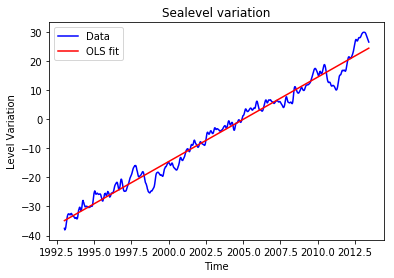

In [17]:
# Part a - Fit linear regression model to training data (find OLS coefficients) #
time_values = sea_level_df['time'].values
level_values = sea_level_df['level_variation'].values
y = level_values
size = time_values.size

# Predict using OLS model
x = np.ones((size,2))
x[:,0] = time_values
xt = x.transpose()
w = np.linalg.inv(xt @ x) @ xt @ y

# Plot training data along with the regression curve
x2 = time_values
y2 = time_values * w[0] + w[1]

plt.plot(time_values, level_values,'b', label='Data')
plt.plot(x2,y2,'r', label='OLS fit')
plt.xlabel('Time')
plt.ylabel('Level Variation')
plt.title('Sealevel variation')
plt.legend()
plt.show()

In [91]:
# Part b - Prediction of testing points #

# Calculate mean squared error between ground truth and predictions
n = sea_level_df_test['level_variation'].size
x = sea_level_df_test['time'].values
y = sea_level_df_test['level_variation'].values
sigma = 0

for i in range (1,n):
    sigma = sigma + (y[i] - (x[i]*w[0]+w[1]))**2
    
mse = (1/n)*sigma

print('MSE = ', mse)

MSE =  90.71609868804542


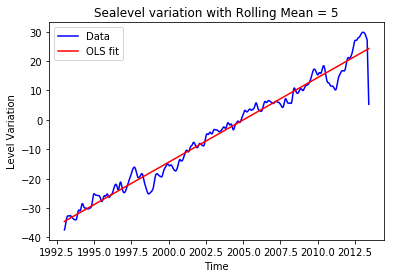

MSE for Rolling 5 =  100.9715515908112


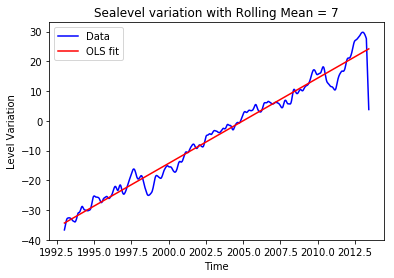

MSE for Rolling 7 =  106.74605415708318


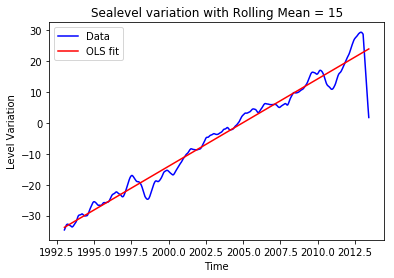

MSE for Rolling 15 =  129.38354478176223


In [151]:
# Part c - data transformations #
xi = sea_level_df['time'].values
yi = sea_level_df['level_variation'].values
size = sea_level_df['time'].size

def roll(v0, v1, window_size):
    size = v0.size
    for i in range (0,size-window_size):
        temp = 0
        for j in range (i,i+window_size):
            temp = temp + v0[j]   
        v1[i] = temp/window_size
        
    #finish last elements
    for i in range (size-window_size, size):
        temp = 0
        for j in range (i, size):
            temp = temp + v0[j]
        v1[i] = temp/window_size
    
def mse(vx, vy, vw):
    n = vx.size
    sigma = 0
    for i in range (1,n):
        sigma = sigma + (vy[i] - (vx[i]*vw[0]+vw[1]))**2
    
    return (1/n)*sigma

################# ROLLING MEAN 5 #################
yj_5 = np.ones(size)
roll(yi, yj_5, 5)

# Part a
x_5 = np.ones((size,2))
x_5[:,0] = xi
x_5_t = x_5.transpose()
w_5 = np.linalg.inv(x_5_t @ x_5) @ x_5_t @ yj_5

x2_5 = xi
y2_5 = xi * w_5[0] + w_5[1]

plt.plot(xi, yj_5,'b', label='Data')
plt.plot(x2_5,y2_5,'r', label='OLS fit')
plt.xlabel('Time')
plt.ylabel('Level Variation')
plt.title('Sealevel variation with Rolling Mean = 5')
plt.legend()
plt.show()

# Part b
x_ground = sea_level_df_test['time'].values
y_ground = sea_level_df_test['level_variation'].values
y_ground_5 = np.ones(y_ground.size)
roll(y_ground, y_ground_5, 5)

mse_5 = mse(x_ground, y_ground_5, w_5)

print('MSE for Rolling 5 = ', mse_5)


################# ROLLING MEAN 7 #################
yj_7 = np.ones(size)
roll(yi, yj_7, 7)

# Part a
x_7 = np.ones((size,2))
x_7[:,0] = xi
x_7_t = x_7.transpose()
w_7 = np.linalg.inv(x_7_t @ x_7) @ x_7_t @ yj_7

x2_7 = xi
y2_7 = xi * w_7[0] + w_7[1]

plt.plot(xi, yj_7,'b', label='Data')
plt.plot(x2_7,y2_7,'r', label='OLS fit')
plt.xlabel('Time')
plt.ylabel('Level Variation')
plt.title('Sealevel variation with Rolling Mean = 7')
plt.legend()
plt.show()

# Part b
y_ground_7 = np.ones(y_ground.size)
roll(y_ground, y_ground_7, 7)

mse_7 = mse(x_ground, y_ground_7, w_7)
print('MSE for Rolling 7 = ', mse_7)

################# ROLLING MEAN 15 #################
yj_15 = np.ones(size)
roll(yi, yj_15, 15)

# Part a
x_15 = np.ones((size,2))
x_15[:,0] = xi
x_15_t = x_15.transpose()
w_15 = np.linalg.inv(x_15_t @ x_15) @ x_15_t @ yj_15


x2_15 = xi
y2_15 = xi * w_15[0] + w_15[1]

plt.plot(xi, yj_15,'b', label='Data')
plt.plot(x2_15,y2_15,'r', label='OLS fit')
plt.xlabel('Time')
plt.ylabel('Level Variation')
plt.title('Sealevel variation with Rolling Mean = 15')
plt.legend()
plt.show()

# Part b
y_ground_15 = np.ones(y_ground.size)
roll(y_ground, y_ground_15, 15)

mse_15 = mse(x_ground, y_ground_15, w_15)
print('MSE for Rolling 15 = ', mse_15)


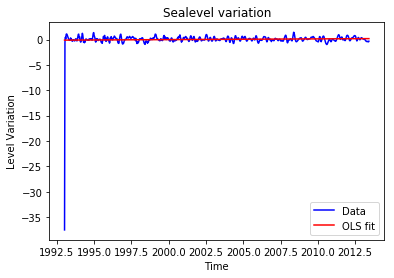

MSE First Order Differencing =  0.1716531163989184


In [102]:
# Part c - data transformations #
# FIRST ORDER DIFFERENCING
yj_fod = np.ones(size)
yj_fod[0] = yi[0]
for i in range (1,size):
    yj_fod[i] = yi[i] - yi[i-1]

# Repeat parts a and b for first order differencing
# Part a - Fit linear regression model to training data (find OLS coefficients) #
x_fod = np.ones((size,2))
x_fod[:,0] = xi
x_fod_t = x_fod.transpose()
w_fod = np.linalg.inv(x_fod_t @ x_fod) @ x_fod_t @ yj_fod

x2_fod = xi
y2_fod = xi * w_fod[0] + w_fod[1]

plt.plot(xi, yj_fod,'b', label='Data')
plt.plot(x2_fod,y2_fod,'r', label='OLS fit')
plt.xlabel('Time')
plt.ylabel('Level Variation')
plt.title('Sealevel variation')
plt.legend()
plt.show()

# Part b - Prediction of testing points #
n = sea_level_df_test['level_variation'].size
y_ground = sea_level_df_test['level_variation'].values
x_ground = sea_level_df_test['time'].values

y_ground_fod = np.ones(size)
y_ground_fod[0] = y_ground[0]
for i in range (1,n):
    y_ground_fod[i] = y_ground[i] - y_ground[i-1]
    
mse_fod = mse(x_ground, y_ground_fod, w_fod)

print('MSE First Order Differencing = ', mse_fod)

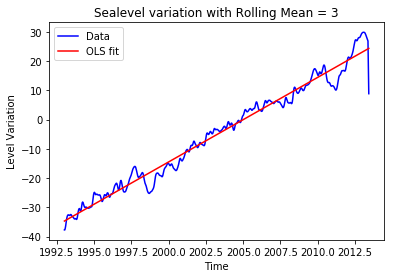

MSE for Rolling 3 =  95.25545558149871


In [105]:
# Part c - data transformations #
# YOUR OWN TRANSFORMATION
# I chose to do rolling mean with a window size of 3 as my own transformation 
# because it seems that option will yield the smallest MSE

################# ROLLING MEAN 3 #################
yj_3 = np.ones(size)
roll(yi, yj_3, 3)

# Part a
x_3 = np.ones((size,2))
x_3[:,0] = xi
x_3_t = x_3.transpose()
w_3 = np.linalg.inv(x_3_t @ x_3) @ x_3_t @ yj_3

x2_3 = xi
y2_3 = xi * w_3[0] + w_3[1]

plt.plot(xi, yj_3,'b', label='Data')
plt.plot(x2_3,y2_3,'r', label='OLS fit')
plt.xlabel('Time')
plt.ylabel('Level Variation')
plt.title('Sealevel variation with Rolling Mean = 3')
plt.legend()
plt.show()

# Part b for Rolling 3- Prediction of testing points #
n = sea_level_df_test['level_variation'].size
y_ground = sea_level_df_test['level_variation'].values
x_ground = sea_level_df_test['time'].values

y_ground_3 = np.ones(n)
roll(y_ground, y_ground_3, 3)

mse_3 = mse(x_ground, y_ground_3, w_3)

print('MSE for Rolling 3 = ', mse_3)

## Problem 2: K-Nearest Neighbors

Consider the following five two-dimensional training points, belonging to class + or class -:

$(0,1,+)$

$(1,1,-)$

$(2,2,+)$

$(2,0,+)$

$(3,1,-)$

**a.** Plot these five points. Then, draw the decision boundary for a **1-nearest-neighbor classifier (with Euclidean distance).** *Be sure to show or explain how you found your decision boundary.*

**b.** Classify the following test points, and add them to your plot:

$(0,0)$

$(1,2)$

$(2,1)$

$(3,3)$

$(4,3)$

*Be sure to explain how you classified the test points.*

**c.** As you may or may not have seen in part b, it is possible for two neighbors with different class labels to have identical distances to a test point. In that case, explain how to choose a class for this point.

The solution is included in a pdf file inside the zip file submitted

## Problem 3: Nearest Neighbors vs. Decision Trees

Not all machine learning algorithms perform well on all types of data; performance is often dependent on how the data is distributed. We ask you to compare the performance accuracies of k-nearest neighbors and decision trees on two datasets: the Iris dataset and the wine dataset.

The Iris flower dataset contains samples of attributes of 3 different variations of Iris flowers. This dataset has become very commonly used in training classification models. In fact, it has become so common that it exists within scikit-learn. The wine dataset contains attributes of 3 different types of wine. The datasets are imported and split into training and testing sets below for you. You can also get a preview of what they look like by running the two cells below.

**a.** Using the `KNeighborsClassifier` and `DecisionTreeClassifier` from scikit-learn, train and test k-nearest neighbors and decision trees on both datasets. When training the k-nearest neighbor algorithm, **do not choose a random number of neighbors, but instead *find the k that achieves the best accuracy in the range 1-10***. Compute the accuracies of each method (hint: you can use scikit-learn's `metrics.accuracy_score`).

**b.** Compare the accuracies of each algorithm on each dataset. **If there is a difference in their performance, why do you think this would be?**

*Please note that since sampling of data is random, accuracies may differ when you run the code again, and they will differ among your peers.*

In [141]:
# Import Iris dataset from scikit-learn, as well as algorithms
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

# Load Iris dataset
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)

# Split data into training and testing sets
X = iris.data
y = iris.target

X_iris_train, X_iris_test, y_iris_train, y_iris_test = train_test_split(X, y, test_size = 0.3) # here, our test set is 30% of whole set

# Show what Iris data looks like
iris_df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [150]:
# Load wine dataset
wine_df = pd.read_csv("wine.csv", names = ["class", "alc", "malic acid", "ash", "alcalinity", "mg", "phenols", "flavanoid", "nonflav phenols", "proanth", "color", "hue", "OD280/OD315", "proline"])

# Split dataset into train and test sets
X = wine_df
y = wine_df.pop('class')

X_wine_train, X_wine_test, y_wine_train, y_wine_test = train_test_split(X, y, test_size = 0.3)

# Show what wine dataset looks like
wine_df.head()

,alc,malic acid,ash,alcalinity,mg,phenols,flavanoid,nonflav phenols,proanth,color,hue,OD280/OD315,proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [146]:
# IRIS DATASET #

# Construct the nearest neighbors classifier.
k1_iris = KNeighborsClassifier(n_neighbors=1)
k2_iris = KNeighborsClassifier(n_neighbors=2)
k3_iris = KNeighborsClassifier(n_neighbors=3)
k4_iris = KNeighborsClassifier(n_neighbors=4)
k5_iris = KNeighborsClassifier(n_neighbors=5)
k6_iris = KNeighborsClassifier(n_neighbors=6)
k7_iris = KNeighborsClassifier(n_neighbors=7)
k8_iris = KNeighborsClassifier(n_neighbors=8)
k9_iris = KNeighborsClassifier(n_neighbors=9)
k10_iris = KNeighborsClassifier(n_neighbors=10)

# Fit the model to the data, and find the k which achieves the best accuracy in the range 1-10.
k1_iris.fit(X_iris_train, y_iris_train)
k2_iris.fit(X_iris_train, y_iris_train)
k3_iris.fit(X_iris_train, y_iris_train)
k4_iris.fit(X_iris_train, y_iris_train)
k5_iris.fit(X_iris_train, y_iris_train)
k6_iris.fit(X_iris_train, y_iris_train)
k7_iris.fit(X_iris_train, y_iris_train)
k8_iris.fit(X_iris_train, y_iris_train)
k9_iris.fit(X_iris_train, y_iris_train)
k10_iris.fit(X_iris_train, y_iris_train)

# Test KNN with testing set
k1_predict = k1_iris.predict(X_iris_test)
k2_predict = k2_iris.predict(X_iris_test)
k3_predict = k3_iris.predict(X_iris_test)
k4_predict = k4_iris.predict(X_iris_test)
k5_predict = k5_iris.predict(X_iris_test)
k6_predict = k6_iris.predict(X_iris_test)
k7_predict = k7_iris.predict(X_iris_test)
k8_predict = k8_iris.predict(X_iris_test)
k9_predict = k9_iris.predict(X_iris_test)
k10_predict = k10_iris.predict(X_iris_test)

# Construct a decision tree on the training data. Weights similar to discussion example
iris_dtr2 = DecisionTreeClassifier(max_depth=2)
iris_dtr5 = DecisionTreeClassifier(max_depth=5)
iris_dtr10 = DecisionTreeClassifier(max_depth=10)

iris_dtr2.fit(X_iris_train, y_iris_train)
iris_dtr5.fit(X_iris_train, y_iris_train)
iris_dtr10.fit(X_iris_train, y_iris_train)

# Test decision tree with testing set
iris_dtr2_predict = iris_dtr2.predict(X_iris_test)
iris_dtr5_predict = iris_dtr5.predict(X_iris_test)
iris_dtr10_predict = iris_dtr10.predict(X_iris_test)

# Compare accuracies between the two algorithms (print them out)
print('For k1 accuracy = ', metrics.accuracy_score(y_iris_test, k1_predict))
print('For k2 accuracy = ', metrics.accuracy_score(y_iris_test, k2_predict))
print('For k3 accuracy = ', metrics.accuracy_score(y_iris_test, k3_predict))
print('For k4 accuracy = ', metrics.accuracy_score(y_iris_test, k4_predict))
print('For k5 accuracy = ', metrics.accuracy_score(y_iris_test, k5_predict))
print('For k6 accuracy = ', metrics.accuracy_score(y_iris_test, k6_predict))
print('For k7 accuracy = ', metrics.accuracy_score(y_iris_test, k7_predict))
print('For k8 accuracy = ', metrics.accuracy_score(y_iris_test, k8_predict))
print('For k9 accuracy = ', metrics.accuracy_score(y_iris_test, k9_predict))
print('For k10 accuracy = ', metrics.accuracy_score(y_iris_test, k10_predict))

print('Decision tree depth 2 accuracy = ', metrics.accuracy_score(y_iris_test, iris_dtr2_predict))
print('Decision tree depth 5 accuracy = ', metrics.accuracy_score(y_iris_test, iris_dtr5_predict))
print('Decision tree depth 10 accuracy = ', metrics.accuracy_score(y_iris_test, iris_dtr10_predict))


For k1 accuracy =  0.9111111111111111
For k2 accuracy =  0.9111111111111111
For k3 accuracy =  0.9333333333333333
For k4 accuracy =  0.9333333333333333
For k5 accuracy =  0.9333333333333333
For k6 accuracy =  0.9555555555555556
For k7 accuracy =  0.9333333333333333
For k8 accuracy =  0.9333333333333333
For k9 accuracy =  0.9333333333333333
For k10 accuracy =  0.9555555555555556
Decision tree depth 2 accuracy =  0.9333333333333333
Decision tree depth 5 accuracy =  0.9555555555555556
Decision tree depth 10 accuracy =  0.9555555555555556


In [148]:
# WINE DATASET #

# Construct the nearest neighbors classifier.
k1_wine = KNeighborsClassifier(n_neighbors=1)
k2_wine = KNeighborsClassifier(n_neighbors=2)
k3_wine = KNeighborsClassifier(n_neighbors=3)
k4_wine = KNeighborsClassifier(n_neighbors=4)
k5_wine = KNeighborsClassifier(n_neighbors=5)
k6_wine = KNeighborsClassifier(n_neighbors=6)
k7_wine = KNeighborsClassifier(n_neighbors=7)
k8_wine = KNeighborsClassifier(n_neighbors=8)
k9_wine = KNeighborsClassifier(n_neighbors=9)
k10_wine = KNeighborsClassifier(n_neighbors=10)

# Fit the model to the data, and find the k which achieves the best accuracy in the range 1-10.
k1_wine.fit(X_wine_train, y_wine_train)
k2_wine.fit(X_wine_train, y_wine_train)
k3_wine.fit(X_wine_train, y_wine_train)
k4_wine.fit(X_wine_train, y_wine_train)
k5_wine.fit(X_wine_train, y_wine_train)
k6_wine.fit(X_wine_train, y_wine_train)
k7_wine.fit(X_wine_train, y_wine_train)
k8_wine.fit(X_wine_train, y_wine_train)
k9_wine.fit(X_wine_train, y_wine_train)
k10_wine.fit(X_wine_train, y_wine_train)

# Test KNN with testing set
k1_predict_wine = k1_wine.predict(X_wine_test)
k2_predict_wine = k2_wine.predict(X_wine_test)
k3_predict_wine = k3_wine.predict(X_wine_test)
k4_predict_wine = k4_wine.predict(X_wine_test)
k5_predict_wine = k5_wine.predict(X_wine_test)
k6_predict_wine = k6_wine.predict(X_wine_test)
k7_predict_wine = k7_wine.predict(X_wine_test)
k8_predict_wine = k8_wine.predict(X_wine_test)
k9_predict_wine = k9_wine.predict(X_wine_test)
k10_predict_wine = k10_wine.predict(X_wine_test)

# Construct a decision tree on the training data. Weights similar to discussion example
wine_dtr2 = DecisionTreeClassifier(max_depth=2)
wine_dtr5 = DecisionTreeClassifier(max_depth=5)
wine_dtr10 = DecisionTreeClassifier(max_depth=10)

wine_dtr2.fit(X_wine_train, y_wine_train)
wine_dtr5.fit(X_wine_train, y_wine_train)
wine_dtr10.fit(X_wine_train, y_wine_train)

# Test decision tree with testing set
wine_dtr2_predict = wine_dtr2.predict(X_wine_test)
wine_dtr5_predict = wine_dtr5.predict(X_wine_test)
wine_dtr10_predict = wine_dtr10.predict(X_wine_test)

# Compare accuracies between the two algorithms (print them out)
print('For k1 accuracy = ', metrics.accuracy_score(y_wine_test, k1_predict_wine))
print('For k2 accuracy = ', metrics.accuracy_score(y_wine_test, k2_predict_wine))
print('For k3 accuracy = ', metrics.accuracy_score(y_wine_test, k3_predict_wine))
print('For k4 accuracy = ', metrics.accuracy_score(y_wine_test, k4_predict_wine))
print('For k5 accuracy = ', metrics.accuracy_score(y_wine_test, k5_predict_wine))
print('For k6 accuracy = ', metrics.accuracy_score(y_wine_test, k6_predict_wine))
print('For k7 accuracy = ', metrics.accuracy_score(y_wine_test, k7_predict_wine))
print('For k8 accuracy = ', metrics.accuracy_score(y_wine_test, k8_predict_wine))
print('For k9 accuracy = ', metrics.accuracy_score(y_wine_test, k9_predict_wine))
print('For k10 accuracy = ', metrics.accuracy_score(y_wine_test, k10_predict_wine))


print('Decision tree depth 2 accuracy = ', metrics.accuracy_score(y_wine_test, wine_dtr2_predict))
print('Decision tree depth 5 accuracy = ', metrics.accuracy_score(y_wine_test, wine_dtr5_predict))
print('Decision tree depth 10 accuracy = ', metrics.accuracy_score(y_wine_test, wine_dtr10_predict))


For k1 accuracy =  0.7777777777777778
For k2 accuracy =  0.6481481481481481
For k3 accuracy =  0.6111111111111112
For k4 accuracy =  0.7037037037037037
For k5 accuracy =  0.7037037037037037
For k6 accuracy =  0.6666666666666666
For k7 accuracy =  0.6666666666666666
For k8 accuracy =  0.6481481481481481
For k9 accuracy =  0.6296296296296297
For k10 accuracy =  0.7037037037037037
Decision tree depth 2 accuracy =  0.8888888888888888
Decision tree depth 5 accuracy =  0.9444444444444444
Decision tree depth 10 accuracy =  0.9444444444444444


Best k for iris = 6 and 10
Best k for wine = 5 and 10
Best tree depth for iris = 10
Best tree depth for wine = 10

Note: this may vary when you run the code again


To start, both parts have fairly high accuracies. However, there are some differences worth mentioning. For the iris set, using KNN Classifier gave a better accuracy than using a decision tree clasifier. On the other hand, for the wine set, using a decision tree proved to be the better option over KNN classifier. This shows us that the best choice for a classifier depends on the data you are trying to classify. 

What most likely happened is that because of the way the data is distributed in the iris data set using KNN was better since there were probably few outliers that would mess up your prediction. On the other hand, the wine data set probably had a lot of points from different classes that would be too close to each other (or many outliers). If this is the case then KNN will work better for those sets whose points are nicely grouped together in their own classes. 

The previous statements make sense since the difference of accuracy between iris and wine using KNN is significant, but this difference in accuaracy is smaller for the decision tree. One could say that if you know how your data is distributed you should use KNN when suitable, but you can also use decision trees when in doubt since the accuracy will be better for sets that wouldnt do so well with KNN.

## Problem 4: Curse of Dimensionality and Nearest Neighbors

**Please note that you may find it easier to program this question in MATLAB. If you choose to use MATLAB, please submit a separate .m file with your code solution and either insert your plots into Jupyter (or, submit a separate document with the plots through Blackboard).**

Consider $n$ data points uniformly distributed in a $p$-dimensional unit ball centered at the origin, and suppose we are interested in nearest neighbors to the origin. It can be shown that the median distance from the origin to the closest data point under this scenario is given by the expression $(1-(\frac{1}{2})^{\frac{1}{n}})^{\frac{1}{p}}$. 

Now consider the following alternative scenario. Suppose $n$ data points are chosen uniformly
from $[−1, 1]^p$ (the interval $[−1, 1]$ in p dimensions). Now consider the nearest neighbor to a point at the origin in terms of the $l_∞$ norm: $\|x − y\|_∞ = max_i|x_i − y_i|$.

**a.** Write a piece of code that generates $n$ data points in $p$ dimensions distributed uniformly
in $[−1, 1]^p$, and computes the $l_∞$ nearest neighbors to the origin. For $n = 5$, $n = 50$, and $n = 500$, plot the nearest neighbor distances as a function of $p$, for $p = 1$ to $200$. On the same plot(s), also show the curves corresponding to the median distance expression given above.

**b.** What do you observe about the relationship between the formula and the $l_∞$ nearest neighbor distances? *Discuss and interpret all of your plots.*

**c. *Bonus*** Prove a relationship between the ∞ nearest neighbor distances and the above formula.

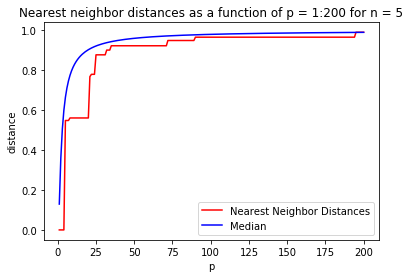

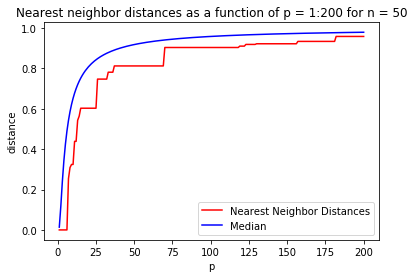

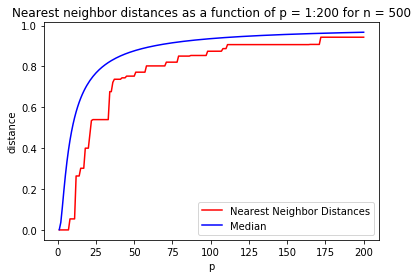

In [207]:
# Plot n p-dimensional uniformly-distributed data points
n = 5
p = 200

data_5 = np.random.uniform(-1,1,[5,p])
data_50 = np.random.uniform(-1,1,[50,p])
data_500 = np.random.uniform(-1,1,[500,p])

near_5 = np.zeros((5,p))
near_50 = np.zeros((50,p))
near_500 = np.zeros((500,p))

minimums_5 = np.zeros(p)
minimums_50 = np.zeros(p)
minimums_500 = np.zeros(p)

# Compute nearest neighbors to the origin in terms of maximum norm
def near_neigh(n, p, data, near, minimums):
    for i in range(n):
        for j in range (p):
            max = 0
            for k in range (j+1):
                if data[i,k] > max:
                    max = data[i,k]
            near[i,j] = max

    for j in range(p):
        mini = 2
        for i in range(n):
            if near[i,j] < mini:
                mini = near[i,j]
            minimums[j] = mini
        
near_neigh(5, p, data_5, near_5, minimums_5)
near_neigh(50, p, data_50, near_50, minimums_50)
near_neigh(500, p, data_500, near_500, minimums_500)

# Plot nearest neighbor distances as a function of p = 1:200 for n = 5, 50, 500. Plot curves 
# corresponding to the median distance expression on the same figure.
x = np.arange(1,201)
value_5 = (1-(1/2)**(1/5))**(1/x)
value_50 = (1-(1/2)**(1/50))**(1/x)
value_500 = (1-(1/2)**(1/500))**(1/x)
median_5 = np.full(200, value_5)
median_50 = np.full(200, value_50)
median_500 = np.full(200, value_500)

plt.plot(x, minimums_5,'r', label='Nearest Neighbor Distances')
plt.plot(x, median_5, 'b', label = "Median")
plt.xlabel('p')
plt.ylabel('distance')
plt.title('Nearest neighbor distances as a function of p = 1:200 for n = 5')
plt.legend()
plt.show()

plt.plot(x, minimums_50,'r', label='Nearest Neighbor Distances')
plt.plot(x, median_50, 'b', label = "Median")
plt.xlabel('p')
plt.ylabel('distance')
plt.title('Nearest neighbor distances as a function of p = 1:200 for n = 50')
plt.legend()
plt.show()

plt.plot(x, minimums_500,'r', label='Nearest Neighbor Distances')
plt.plot(x, median_500, 'b', label = "Median")
plt.xlabel('p')
plt.ylabel('distance')
plt.title('Nearest neighbor distances as a function of p = 1:200 for n = 500')
plt.legend()
plt.show()


Part b

It seems that the median distance from the origin to the closest data point is similar to l_∞ nearest neighbors to the origin.

For n = 5 it seems that the l_∞ is closer to the formula's function. For high values of p, it even seems to be the same distance for both functions. 

For n = 50, the l_∞ function still resembles the given formula. However, the distance values of both functions in general seem to be further away from each other. They don't touch for high values of p, but it does seem that if we have values of p > 200 the functions would intersect and act similarly for this values.

For n = 500, the l_∞ distances seem to be further away from the formula values when compared to the plots of smaller values of n. It still resembles the formula a lot and it seems that if we had a higher p value then these two would intersect and have similar behaviors for high values of p.
